## Exercises

All exercises should be completed using device-agonistic code.

In [1]:
# Create device-agonistic code
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

1. Make a binary classification dataset with Scikit-Learn's make_moons() function.
* For consistency, the dataset should have 1000 samples and a random_state=42.
* Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [2]:
from sklearn.datasets import make_moons

n_samples=1000

X,y=make_moons(n_samples,
               noise=0.07,
               random_state=42)

X[:5],y[:5]

(array([[-0.03341062,  0.4213911 ],
        [ 0.99882703, -0.4428903 ],
        [ 0.88959204, -0.32784256],
        [ 0.34195829, -0.41768975],
        [-0.83853099,  0.53237483]]),
 array([1, 1, 1, 1, 0]))

In [3]:
# Turn data into dataframe
import pandas as pd

data_df=pd.DataFrame({"X0":X[:,0],
                      "X1":X[:,1],
                      "labels":y})

data_df

,X0,X1,labels
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0
...,...,...,...
995,0.803092,0.554727,0
996,-0.152207,0.936422,0
997,1.671254,-0.324041,1
998,-0.953016,0.302205,0


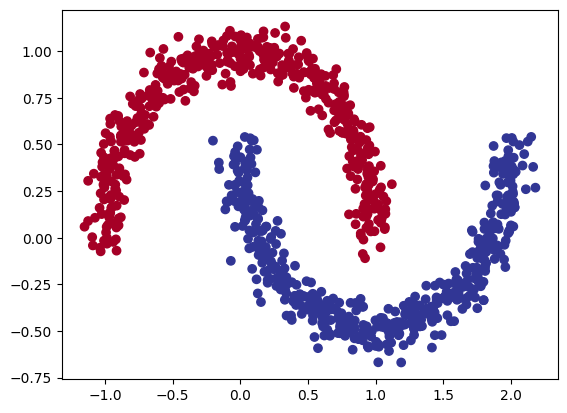

In [4]:
# Visualize the data on a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
            X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [5]:
# Turn the data into tensor
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)


X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)
len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

In [6]:
import torch
from torch import nn

class MoonsModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=2,
                  out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,
                  out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,
                  out_features=1)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

model=MoonsModel()

model

MoonsModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [7]:
model.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[-0.5243, -0.2118],
                      [-0.2154,  0.6855],
                      [-0.1887,  0.3860],
                      [ 0.2869, -0.4940],
                      [-0.6847, -0.3537],
                      [-0.1465, -0.3344],
                      [ 0.6928, -0.1498],
                      [-0.2546, -0.2374],
                      [ 0.3872,  0.2521],
                      [-0.4546,  0.4637]])),
             ('linear_layer_stack.0.bias',
              tensor([-0.1720, -0.0152,  0.4261,  0.3947, -0.1762,  0.1230,  0.4335,  0.4934,
                      -0.6319,  0.6664])),
             ('linear_layer_stack.2.weight',
              tensor([[-0.1522,  0.1286,  0.1772, -0.1298, -0.1453,  0.2736, -0.2127,  0.2513,
                        0.2719,  0.1277],
                      [-0.1220,  0.1467,  0.2960, -0.1920,  0.0307, -0.0818,  0.0125, -0.2002,
                       -0.0162,  0.0062],
                      [-0.2552, -

3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [8]:
# Create loss fn
loss_fn=nn.BCEWithLogitsLoss()

# Create optimizer
optimizer=torch.optim.SGD(params=model.parameters(),
                       lr=0.1)

4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
* Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
* To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
* Train the model for long enough for it to reach over 96% accuracy.
* The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [9]:
# Create a logits
logits=model(X_train)
logits[:5]

tensor([[-0.6162],
        [-0.3444],
        [-0.3110],
        [-0.3153],
        [-0.4359]], grad_fn=<SliceBackward0>)

In [10]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [11]:
# Create a prediction probabilites
pred_prob=torch.sigmoid(logits)
pred_prob[:5],pred_prob.shape

(tensor([[0.3506],
         [0.4147],
         [0.4229],
         [0.4218],
         [0.3927]], grad_fn=<SliceBackward0>),
 torch.Size([800, 1]))

In [12]:
pred_prob=pred_prob.squeeze()
pred_prob[:5]

tensor([0.3506, 0.4147, 0.4229, 0.4218, 0.3927], grad_fn=<SliceBackward0>)

In [13]:
# Create a predicition label
pred_labels=torch.round(pred_prob)
pred_labels[:5]

tensor([0., 0., 0., 0., 0.], grad_fn=<SliceBackward0>)

In [14]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [16]:
# Create an accuracy
!pip install torchmetrics
from torchmetrics import Accuracy

acc_fn=Accuracy(task="binary",
             num_classes=2)
acc_fn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 19.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

BinaryAccuracy()

In [24]:
torch.manual_seed(42)

epochs=100

for epoch in range(epochs+1):
  #Training
  model.train()

  #Forward
  y_logits=model(X_train).squeeze()
  y_preds=torch.round(torch.sigmoid(y_logits))

  #loss / acc fn
  loss=loss_fn(y_logits,
               y_train)
  acc=acc_fn(y_train,
          y_preds)

  #reset optimizer
  optimizer.zero_grad()

  #backwardpropagation
  loss.backward()

  #gradient descent
  optimizer.step()

  #Testing
  model.eval()

  #Forward
  with torch.inference_mode():
    test_logits=model(X_test).squeeze()
    test_preds=torch.round(torch.sigmoid(test_logits))

    #loss / acc fn
    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=acc_fn(y_test,
            test_preds)

  # Print fn
  if epoch % 10 ==0:
    print(f"Epochs: {epoch} | loss: {loss:.4f} | acc: {acc:.2f}% | test loss: {test_loss:.4f} | test acc: {test_acc:.2f}%")

Epochs: 0 | loss: 0.1143 | acc: 0.95% | test loss: 0.1095 | test acc: 0.97%
Epochs: 10 | loss: 0.1100 | acc: 0.96% | test loss: 0.1051 | test acc: 0.98%
Epochs: 20 | loss: 0.1058 | acc: 0.96% | test loss: 0.1008 | test acc: 0.98%
Epochs: 30 | loss: 0.1017 | acc: 0.96% | test loss: 0.0966 | test acc: 0.98%
Epochs: 40 | loss: 0.0976 | acc: 0.96% | test loss: 0.0925 | test acc: 0.98%
Epochs: 50 | loss: 0.0936 | acc: 0.97% | test loss: 0.0884 | test acc: 0.98%
Epochs: 60 | loss: 0.0898 | acc: 0.97% | test loss: 0.0845 | test acc: 0.98%
Epochs: 70 | loss: 0.0860 | acc: 0.97% | test loss: 0.0807 | test acc: 0.98%
Epochs: 80 | loss: 0.0824 | acc: 0.97% | test loss: 0.0771 | test acc: 0.98%
Epochs: 90 | loss: 0.0789 | acc: 0.98% | test loss: 0.0736 | test acc: 0.98%
Epochs: 100 | loss: 0.0756 | acc: 0.98% | test loss: 0.0702 | test acc: 0.99%


In [25]:
# Make Prediction
model.eval()
with torch.inference_mode():
  y_logit=model(X_test).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logit))

y_pred[:5]

tensor([1., 0., 1., 0., 1.])

In [26]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [40]:
import requests
from pathlib import Path

if Path ("helper_functions.py").is_file():
  print("It's already downloaded, skipped download")
else:
  print("Downloading helper_function.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

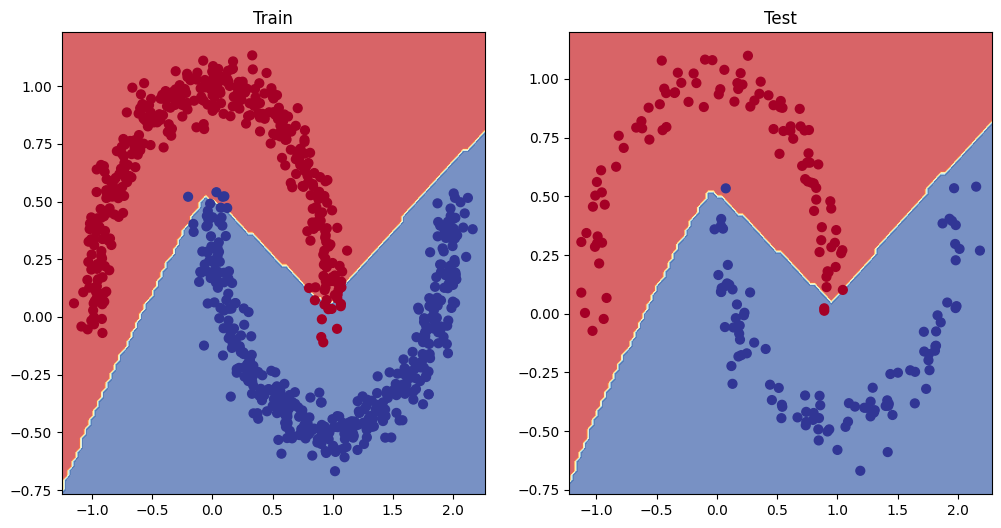

In [28]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,
                       X_train,
                       y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,
                       X_test,
                       y_test)


6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

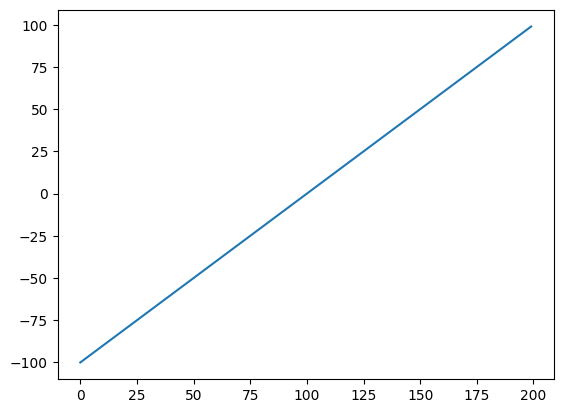

In [29]:
A=torch.arange(-100,100,1)
plt.plot(A)

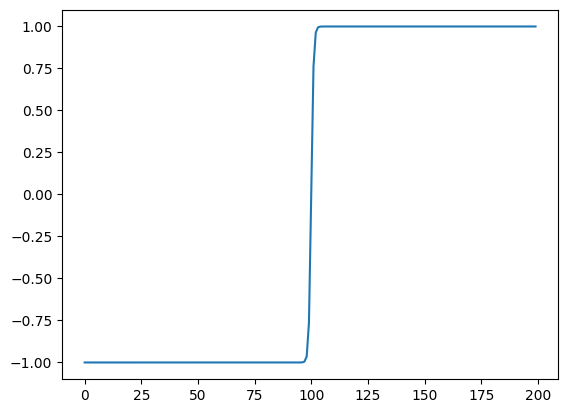

In [30]:
plt.plot(torch.tanh(A))

In [31]:
tan_A=torch.tanh(A)

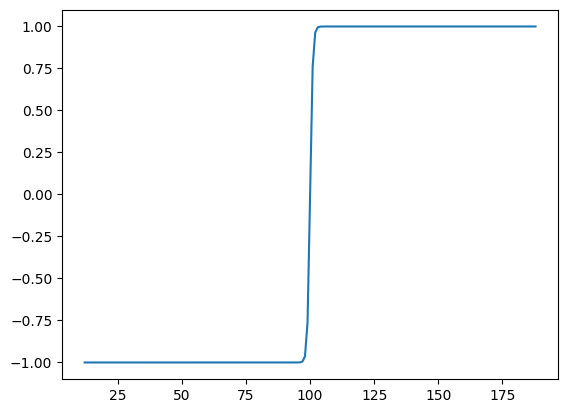

In [30]:
import matplotlib.pyplot as plt
def tanh(x):
  return (torch.exp(x)-torch.exp(-x)) / (torch.exp(-x)+torch.exp(x))

plt.plot(tanh(A))

7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
* Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
* Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
* Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
* Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

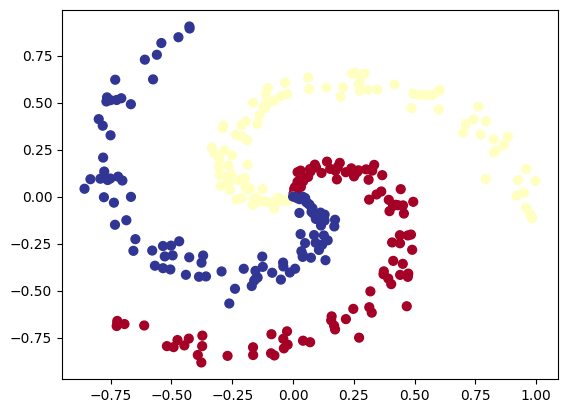

In [15]:
# Code for creating a sprial dataset from CS231n
import numpy as np
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)
N=100 # no of points per class
D=2 #dimenstonality
K=3 #no of classes
X=np.zeros((N*K,D)) # data matrix (each row=single eg)
y=np.zeros(N*K,dtype="uint8") # class labels
for j in range(K):
  ix=range(N*j,N*(j+1))
  r=np.linspace(0.0,1,N) # radius
  t=np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix]=np.c_[r*np.sin(t),r*np.cos(t)]
  y[ix]=j

# Let's visualize the data
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
            X[:,1],
            c=y,
            s=40,
            cmap=plt.cm.RdYlBu)

In [16]:
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.LongTensor)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(240, 240, 60, 60)

In [18]:
X_train.shape

torch.Size([240, 2])

In [20]:
# build the model
from torch import nn
class SpiralsModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

model_1=SpiralsModel(input_features=D,
                     output_features=K,
                     hidden_units=10)

model_1

SpiralsModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [21]:
# create a logits
logits=model_1(X_train)
logits[:5]

tensor([[-0.0800, -0.0944,  0.2037],
        [-0.0620, -0.0602,  0.2016],
        [-0.1026, -0.1326,  0.1738],
        [-0.0857, -0.1129,  0.1731],
        [-0.1076, -0.1462,  0.1687]], grad_fn=<SliceBackward0>)

In [22]:
y_train[:5]

tensor([2, 0, 0, 1, 1])

In [23]:
# create a prediction probabilites
pred_prob=torch.softmax(logits,dim=1)
pred_prob[:5]

tensor([[0.3018, 0.2975, 0.4008],
        [0.3027, 0.3033, 0.3940],
        [0.3041, 0.2951, 0.4009],
        [0.3059, 0.2977, 0.3963],
        [0.3048, 0.2933, 0.4019]], grad_fn=<SliceBackward0>)

In [24]:
# create a labels
labels=torch.argmax(pred_prob,dim=1)
labels[:5]

tensor([2, 2, 2, 2, 2])

In [25]:
# bulid the loss and optimizer
loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.Adam(params=model_1.parameters(),
                           lr=0.02)

In [31]:
!pip install torchmetrics
from torchmetrics import Accuracy
acc_fn_1=Accuracy(task="multiclass",
                 num_classes=3)

acc_fn_1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 4.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

MulticlassAccuracy()

In [37]:
torch.manual_seed(42)

epochs=1000

for epoch in range(epochs+1):
  #Training
  model_1.train()

  #Forward
  y_logits=model_1(X_train)
  y_preds=torch.softmax(y_logits,
                        dim=1).argmax(dim=1)

  # loss /acc
  loss=loss_fn(y_logits,
               y_train)
  acc=acc_fn_1(y_train,
          y_preds)

  #reset optimizer
  optimizer.zero_grad()

  #backwardpropagation
  loss.backward()

  #Optimizer step
  optimizer.step()

  # Testing
  model_1.eval()

  #Forward
  with torch.inference_mode():
    test_logits=model_1(X_test)
    test_preds=torch.softmax(test_logits,
                             dim=1).argmax(dim=1)

    # loss / acc
    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=acc_fn_1(y_test,
                      test_preds)

  # print fn
  if epoch % 100 ==0:
    print(f"Epochs: {epoch} | loss: {loss:.4f} | acc: {acc:.2f}% | test loss: {test_loss:.4f} | test acc: {test_acc:.2f}%")

Epochs: 0 | loss: 0.0147 | acc: 0.99% | test loss: 0.0001 | test acc: 1.00%
Epochs: 100 | loss: 0.0145 | acc: 0.99% | test loss: 0.0001 | test acc: 1.00%
Epochs: 200 | loss: 0.0143 | acc: 0.99% | test loss: 0.0000 | test acc: 1.00%
Epochs: 300 | loss: 0.0142 | acc: 0.99% | test loss: 0.0000 | test acc: 1.00%
Epochs: 400 | loss: 0.0141 | acc: 0.99% | test loss: 0.0000 | test acc: 1.00%
Epochs: 500 | loss: 0.0141 | acc: 0.99% | test loss: 0.0000 | test acc: 1.00%
Epochs: 600 | loss: 0.0141 | acc: 0.99% | test loss: 0.0000 | test acc: 1.00%
Epochs: 700 | loss: 0.0140 | acc: 0.99% | test loss: 0.0000 | test acc: 1.00%
Epochs: 800 | loss: 0.0140 | acc: 0.99% | test loss: 0.0000 | test acc: 1.00%
Epochs: 900 | loss: 0.0139 | acc: 0.99% | test loss: 0.0000 | test acc: 1.00%
Epochs: 1000 | loss: 0.0139 | acc: 0.99% | test loss: 0.0000 | test acc: 1.00%


In [38]:
# Make a predictions
model_1.eval()
with torch.inference_mode():
  y_logit=model_1(X_test)
  y_pred=torch.softmax(y_logit,dim=1).argmax(dim=1)

y_pred[:5]

tensor([2, 2, 1, 0, 2])

In [35]:
y_test[:5]

tensor([2, 2, 1, 0, 2])

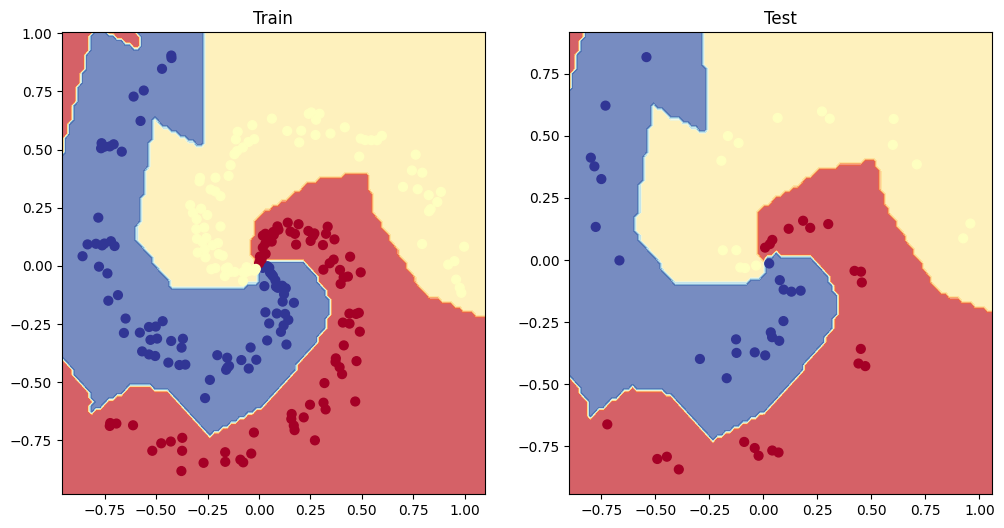

In [41]:
# plot decision boundaries for training and testing sets
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,
                       X_train,
                       y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,
                       X_test,
                       y_test)